# DSCI 100 Final Project

### Predicting the Number of Kids Using Purchasing Pattern

Pranay Aggarwal, DSCI 100-005

13 April 2023

## Introduction


Marketing is a key component in determining the success [1] of a business and big companies spend millions on marketing alone each year. A marketing campaign that resonates with the general public and the focus group of the company can help in a huge increase in the sales of a product and can lead to an unprecedented growth of the company. 

Marketing campaigns, if done right, can help build a brand that disrupts the current status quo and bring in goods and services at a much more competitive pricing and quality level helping in improving the consumer’s lifestyles.

However, there have been numerous instances in the past where lack of comprehensive and in depth information about the customer has cost a company fatal losses and at times, complete backlash from the people affecting the public image of a brand. 
Taking this into account, it is an absolute necessity for a company to understand the behaviour of its audience and for this, various studies have been conducted. 

One of them is the customer personality analysis [2] , extracted from Kaggle, which can be used to find out the relationship between the income levels and amount of a certain product that they purchased and how that will be useful in predicting the number of kids in a household. 
The customer personality analysis dataset is an analysis of a company’s target audience which helps the company better focus on improving their products based on their customers’ preferences. It helps the company understand their consumers and make them more accurate while employing marketing strategies to attract more business and thus plays a vital role in the success of an ad campaign. 


![image](https://themarketingfaculty.com/wp-content/uploads/2021/03/Homepage-GIF-PNG-1024x683.gif)



### Question: 

 **Can income levels and purchasing pattern predict the number of kids in a given household?**  [3]


## Loading all the required libraries

Before starting our analysis, we will import some useful libraries such as tidyverse, repr, ggplot2 etc. which will be used for our future code building.

In [1]:
# Importing the libraries.

library(tidyverse)
library(tidymodels)
library(rsample)
library(repr)
library(httr)
library(readxl)
library(ggplot2)
library(GGally)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Preliminary exploratory data analysis

### Loading the dataset into R

![image](https://media.giphy.com/media/xT9C25UNTwfZuk85WP/giphy-downsized-large.gif)

In [2]:
# Reading the data from Github

marketing <- read_tsv("https://raw.githubusercontent.com/pranay-aggarwal/DSCI-100-Project/main/marketing_campaign.csv")
head(marketing)

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


*Table 1: The dataset*

### Cleaning the data

We clean the data and only select the columns which are needed for our analysis and answering our question. (i.e the Income and the purchasing pattern variables)

In [3]:
# Selecting and Filtering the dataset to contain only the useful data.

marketing_clean <- marketing |>
                    select(Kidhome,Income,10:15) |> 
                    filter(!is.na(Income) & !is.na(MntMeatProducts) & !is.na(MntFishProducts))
head(marketing_clean)

Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,58138,635,88,546,172,88,88
1,46344,11,1,6,2,1,6
0,71613,426,49,127,111,21,42
1,26646,11,4,20,10,3,5
1,58293,173,43,118,46,27,15
0,62513,520,42,98,0,42,14


*Table 2: The clean dataset being used for our model*

### Factoring the dataset 

Mutating the Kidhome variable as a factor as it is the predictor variable

In [4]:
# Factoring the Kidhome variable. 

marketing_clean <- mutate(marketing_clean, Kidhome = as_factor(Kidhome))

### Summarizing the data

To show the mean values for the different education level from the unscaled data

In [5]:
marketing_summary <- marketing_clean |>                                               # Finding the mean of all potential predictor variables using 
                    group_by(Kidhome) |>                                              # group_by() and summarize()
                    summarize(mean_Income = mean(Income, na.rm = TRUE),
                              mean_Wines =  mean(MntWines, na.rm = TRUE),
                              mean_fruits = mean(MntFruits, na.rm = TRUE),
                              mean_meat  = mean(MntMeatProducts, na.rm = TRUE),
                              mean_fish = mean(MntFishProducts, na.rm = TRUE),
                              mean_sweet = mean(MntSweetProducts, na.rm = TRUE),
                              mean_gold = mean(MntGoldProds, na.rm = TRUE))
marketing_summary

Kidhome,mean_Income,mean_Wines,mean_fruits,mean_meat,mean_fish,mean_sweet,mean_gold
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,61779.86,452.2377,39.400624,253.40530,56.270460,40.590803,60.04521
1,39138.08,104.3405,8.541150,49.10936,12.281849,8.612176,22.11161
2,39149.50,72.0000,6.043478,30.08696,6.869565,3.891304,16.86957


*Table 3: Mean of all potential predictor variables grouped by Kidhome*

### Scaling the data

Standardizing and Normalizing the data to fit the scale better and to have equal contribution of all variables.

In [6]:
# Standardizing the dataset to have equal weightage.

marketing_scaled <- marketing_clean |>
                      mutate(across(2:8, scale))
head(marketing_scaled)

Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
0,0.2340099,0.9780050,1.5490798,1.6898454,2.4540138,1.4844919006,0.84983876
1,-0.2345065,-0.8718271,-0.6371840,-0.7178241,-0.6508910,-0.6337371427,-0.73270190
0,0.7693040,0.3584298,0.5690305,-0.1783278,1.3399009,-0.1467879374,-0.03792796
1,-1.0170092,-0.8718271,-0.5617956,-0.6554030,-0.5047778,-0.5850422222,-0.75200118
1,0.2401673,-0.3915822,0.4182537,-0.2184556,0.1527314,-0.0007031757,-0.55900842
0,0.4078067,0.6370904,0.3931242,-0.3076286,-0.6874192,0.3645087283,-0.57830769


*Table 4: The standardized dataset*

Our dataset contain an outliar which has a standardized income value of more than 15. This will affect our model significantly and thus, it is necessary to not consider it during our model building. 

In [7]:
# Removing the outliar

marketing_scaled <- marketing_scaled |>
                       filter(Income <= 15) 

head(marketing_scaled)

Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
0,0.2340099,0.9780050,1.5490798,1.6898454,2.4540138,1.4844919006,0.84983876
1,-0.2345065,-0.8718271,-0.6371840,-0.7178241,-0.6508910,-0.6337371427,-0.73270190
0,0.7693040,0.3584298,0.5690305,-0.1783278,1.3399009,-0.1467879374,-0.03792796
1,-1.0170092,-0.8718271,-0.5617956,-0.6554030,-0.5047778,-0.5850422222,-0.75200118
1,0.2401673,-0.3915822,0.4182537,-0.2184556,0.1527314,-0.0007031757,-0.55900842
0,0.4078067,0.6370904,0.3931242,-0.3076286,-0.6874192,0.3645087283,-0.57830769


*Table 5: The standardized data without the outliars*

### Adjusting the classes

The data points for Kidhome = 2 are very limited, thus we will combine it with kid number = 1 to fit our model for houses having 0 or multiple kids 

**After the following adjustments**
* Kidhome = 0 represents no kids
* Kidhome = 1 represents 1 or more kids

In [8]:
marketing_scaled_0 <- marketing_scaled |>      # Subdividing the datasets into the three classes
                       filter(Kidhome == 0) 

marketing_scaled_1 <- marketing_scaled |>
                       filter(Kidhome == 1) 

marketing_scaled_2 <- marketing_scaled |>
                       filter(Kidhome == 2) 

marketing_scaled_2$Kidhome = 1                 # Changing the value of class Kidhome = 2

marketing_scaled <- rbind(marketing_scaled_0, marketing_scaled_1 ,marketing_scaled_2)   # Binding the datasets

head(marketing_scaled)

Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
0,0.2340099,0.9780050,1.5490798,1.68984542,2.4540138,1.4844919,0.84983876
0,0.7693040,0.3584298,0.5690305,-0.17832778,1.3399009,-0.1467879,-0.03792796
0,0.4078067,0.6370904,0.3931242,-0.30762855,-0.6874192,0.3645087,-0.57830769
0,0.1345783,-0.2077848,0.9711020,-0.01335783,0.2257880,0.5349410,-0.32741710
0,-1.7775837,-0.8866494,-0.2602420,-0.69553086,-0.4865136,-0.6337371,-0.53970914
0,0.4284637,-0.3293282,0.8705842,1.39557470,3.4220135,2.0688309,-0.26951927


*Table 6: New dataset with a combined class for non-zero kids*

### Test-Training split

We will only use the training set when building the classifier. Then, we will use the testing data set to evaluate the accuracy of our classifier.
For this dataset, we will create an 80-20 data split for better accuracy

In [9]:
set.seed(133) # Seed value DO NOT REMOVE
marketing_split <- initial_split(marketing_scaled, prop = 0.80, strata = Kidhome)   # Creating the initial split
marketing_train <- training(marketing_split)
marketing_test <- testing(marketing_split)

marketing_split_label <- full_join(marketing_train |>                               # Creating a full join to separate data by test-training data
                                   mutate(is_training = TRUE),                      # in the original dataset
                                     marketing_test |>
                                   mutate(is_training = FALSE))

head(marketing_split_label)
     

Joining, by = c("Kidhome", "Income", "MntWines", "MntFruits",
"MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
"is_training")


Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,is_training
<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<lgl>
0,0.2340099,0.9780050,1.5490798,1.68984542,2.4540138,1.4844919,0.8498388,TRUE
0,0.4078067,0.6370904,0.3931242,-0.30762855,-0.6874192,0.3645087,-0.5783077,TRUE
0,0.1345783,-0.2077848,0.9711020,-0.01335783,0.2257880,0.5349410,-0.3274171,TRUE
0,-1.7775837,-0.8866494,-0.2602420,-0.69553086,-0.4865136,-0.6337371,-0.5397091,TRUE
0,0.4284637,-0.3293282,0.8705842,1.39557470,3.4220135,2.0688309,-0.2695193,TRUE
0,-1.3873652,-0.8955428,-0.3105009,-0.66877898,-0.5778344,-0.6337371,-0.7520012,TRUE


*Table 7: The training and testing data with a segregation indicator*

In [10]:
marketing_train_summary <- marketing_train |>                                 # Counting and grouping the Kidhome variable in train Data using
                              group_by(Kidhome) |>                            # group_by(), summarize(), and mutating the percent split
                              summarize(n = n()) |>
                              mutate(percent = 100*n/nrow(marketing_train))

marketing_test_summary <- marketing_test |>                                   # Counting and grouping the Kidhome variable in test Data
                              group_by(Kidhome) |>                            # group_by(), summarize(), and mutating the percent split
                              summarize(n = n()) |>
                              mutate(percent = 100*n/nrow(marketing_test))

marketing_train_summary
marketing_test_summary

Kidhome,n,percent
<fct>,<int>,<dbl>
0,1026,57.93337
1,745,42.06663


Kidhome,n,percent
<fct>,<int>,<dbl>
0,257,57.88288
1,187,42.11712


*Table 8: Count of number of kids split in training and testing data*

Visualization this data to better understand the split and number of values it contain.

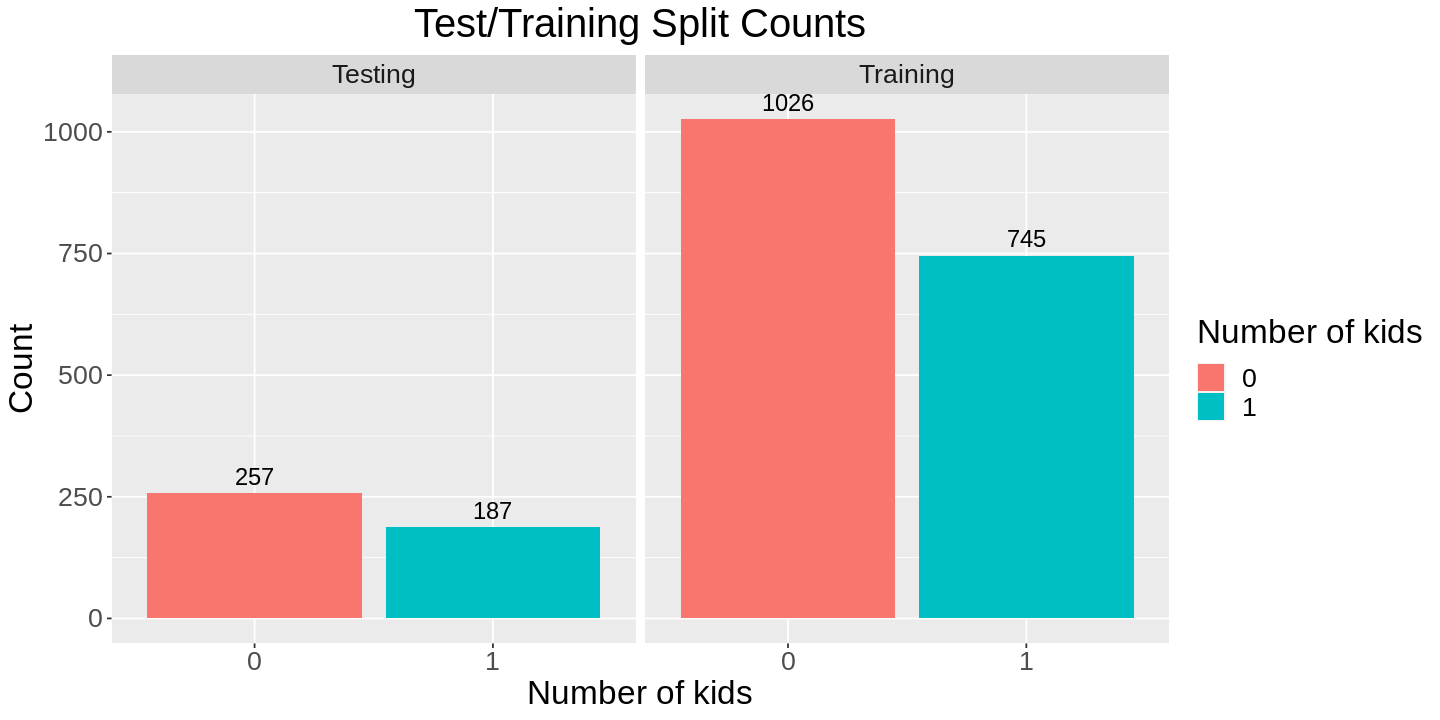

In [11]:
options(repr.plot.width = 12, repr.plot.height = 6) 

training_bar_plot <- marketing_split_label |>                          # Creating a bar graph to visualize the split in training and testing data
                        ggplot(aes(x = Kidhome, fill = Kidhome)) +     # using ggplot and filling by the Kidhome variable 
                        geom_bar() +
                        labs(x = "Number of kids", 
                             y = "Count",
                             fill = "Number of kids") +
                        geom_text(stat='count', aes(label=..count..), vjust = -0.5, size=5) +
                        ggtitle("Test/Training Split Counts") +
                        theme(text = element_text(size=20),
                              plot.title = element_text(hjust = 0.5)) +
                              facet_wrap(~ is_training, 
                                          labeller = labeller(is_training = c("TRUE" = "Training", "FALSE" = "Testing")))
training_bar_plot

*Fig 1: Training and testing data visualized*

## Visualization:

Visualizing all the possible variables for y-axis with Income of a household to select best variables for classification. 

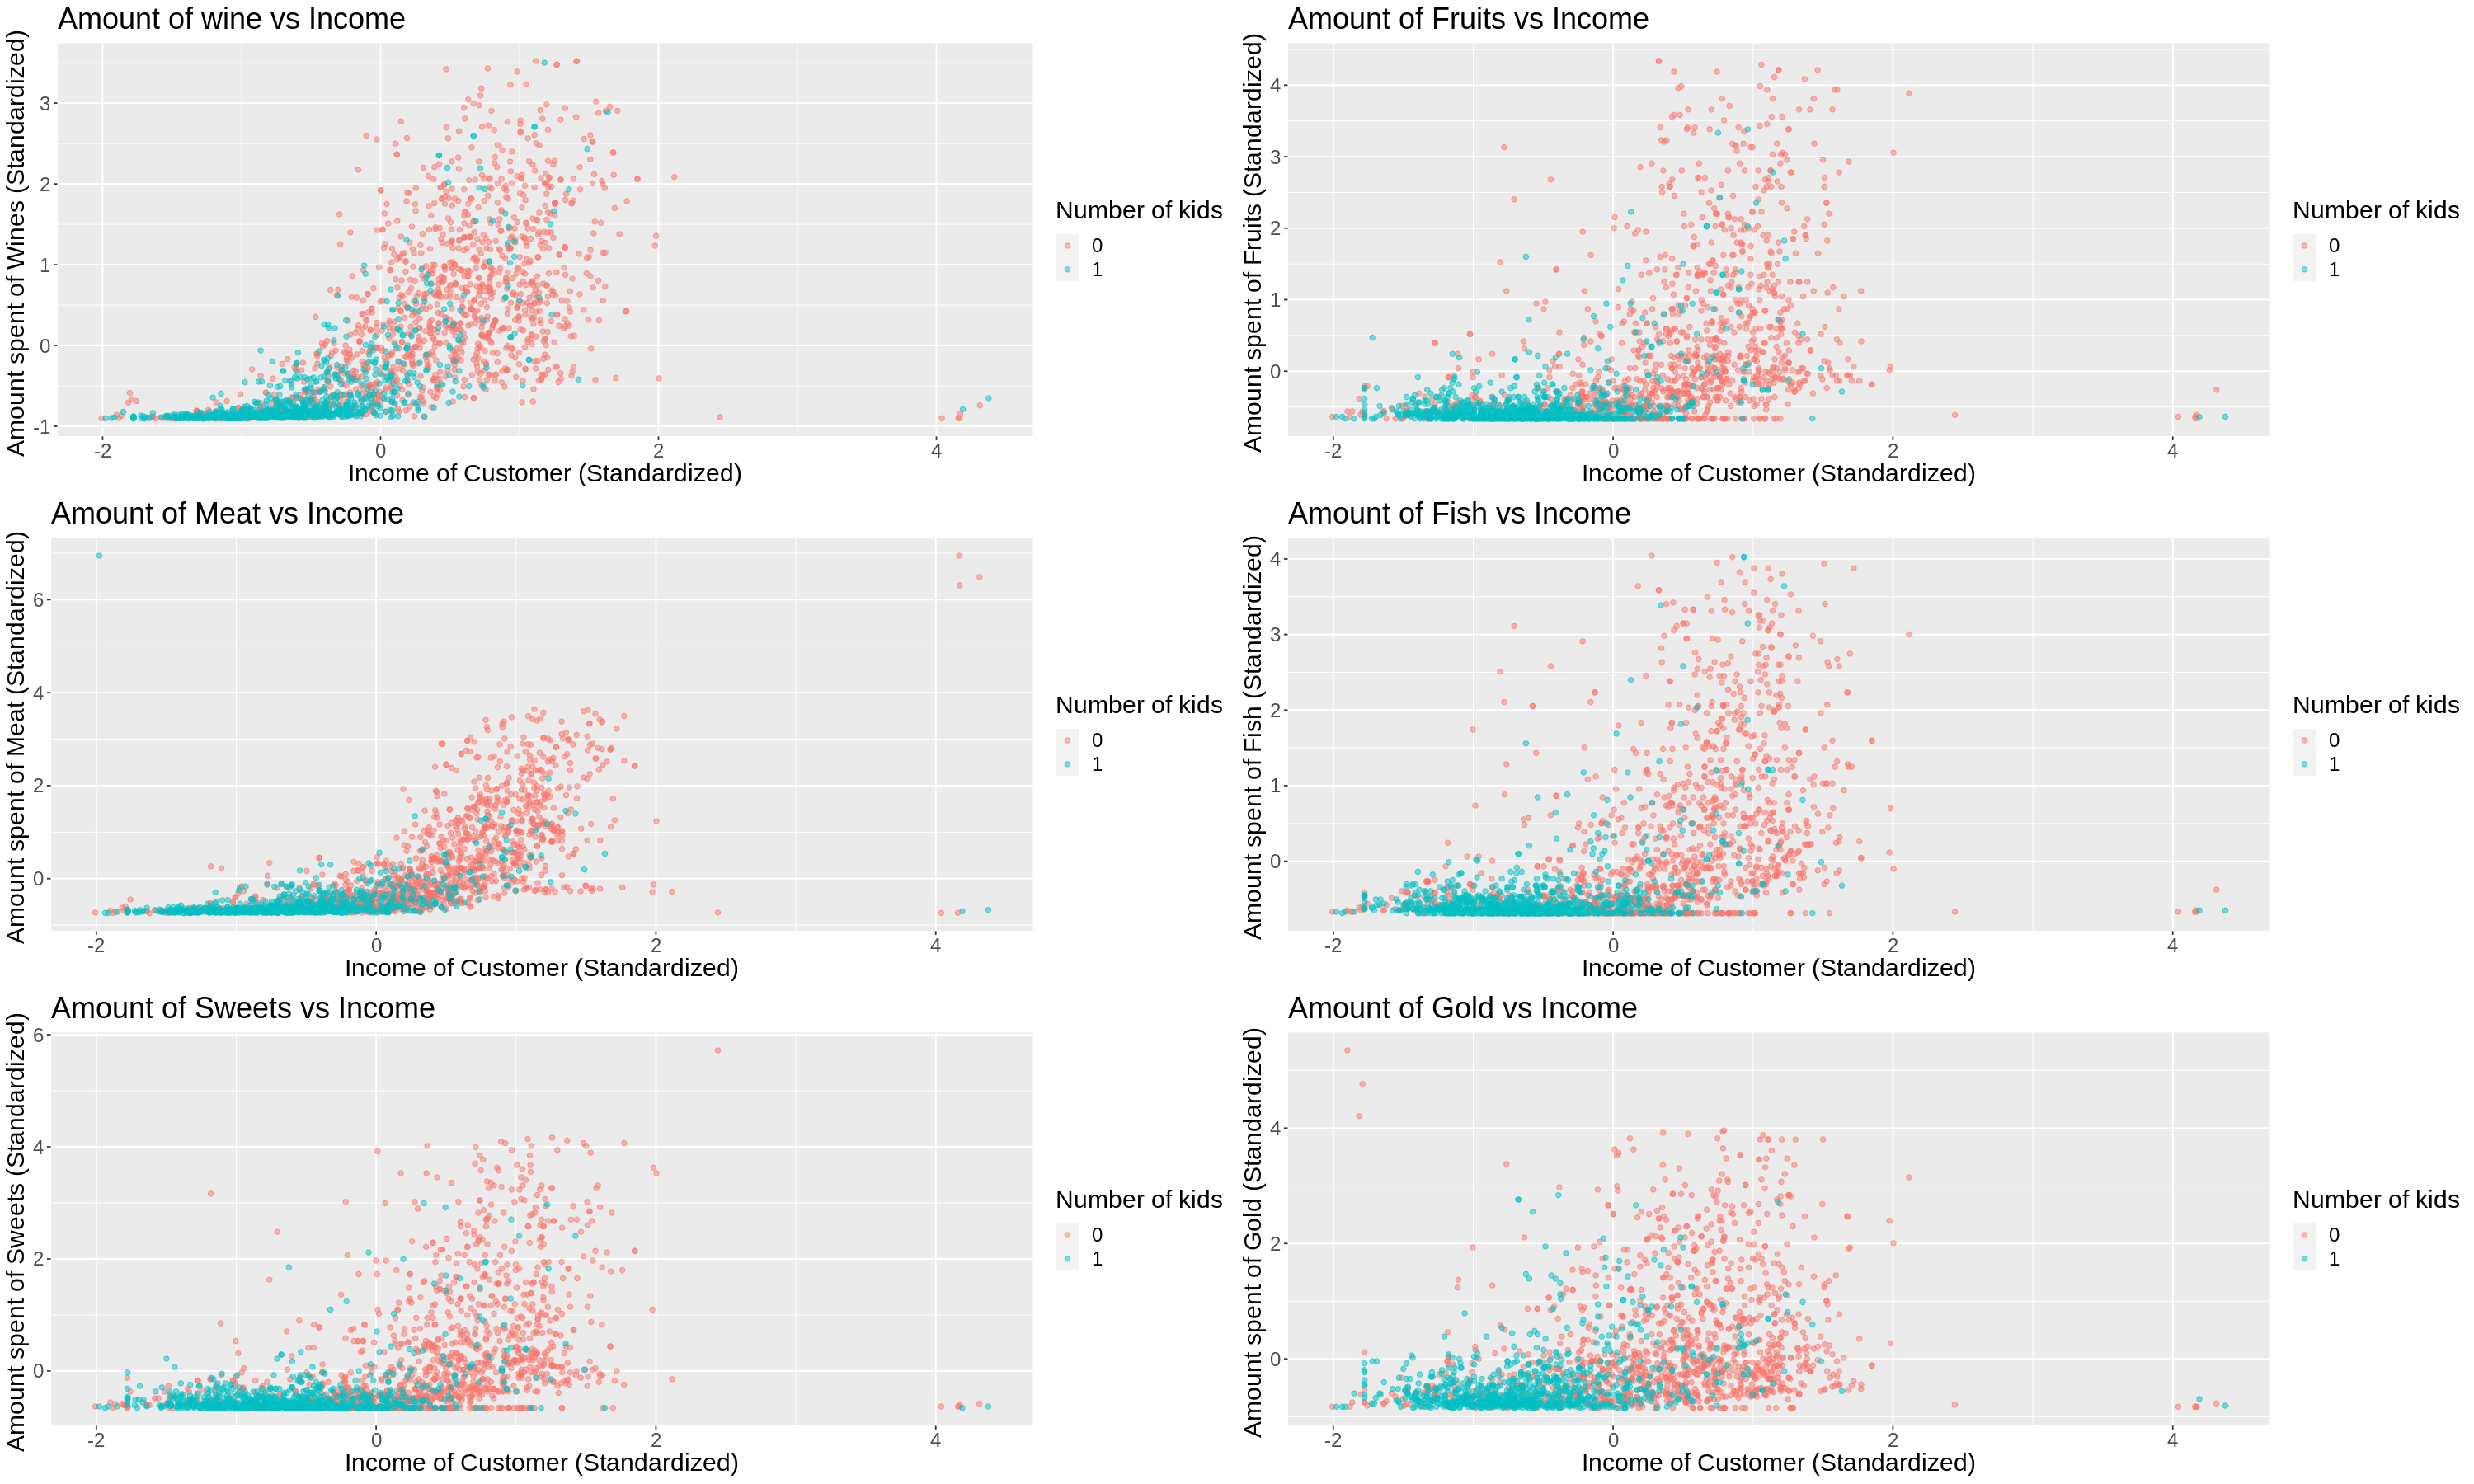

In [12]:
options(repr.plot.height = 15, repr.plot.width = 25)

marketing_wine <- ggplot (marketing_scaled, aes(x = Income , y = MntWines, color = Kidhome)) +         # Creating a scatter plot for Income and Amount of Wines
                    geom_point(alpha = 0.5) + 
                    xlab("Income of Customer (Standardized)") +
                    ylab("Amount spent of Wines (Standardized) ") +
                    ggtitle("Amount of wine vs Income") +
                    labs(color = "Number of kids") +
                    theme(text = element_text(size=18))
                    

marketing_fruit <- ggplot (marketing_scaled, aes(x = Income , y = MntFruits, color = Kidhome)) +       # Creating a scatter plot for Income and Amount of Fruits
                    geom_point(alpha = 0.5) +
                    xlab("Income of Customer (Standardized)") +
                    ylab("Amount spent of Fruits (Standardized) ") +
                    ggtitle("Amount of Fruits vs Income") +
                    labs(color = "Number of kids") +
                    theme(text = element_text(size=18))


marketing_meat <- ggplot (marketing_scaled, aes(x = Income , y = MntMeatProducts, color = Kidhome)) + # Creating a scatter plot for Income and Amount of Meat
                    geom_point(alpha = 0.5) +
                    xlab("Income of Customer (Standardized)") +
                    ylab("Amount spent of Meat (Standardized) ") +
                    ggtitle("Amount of Meat vs Income") +
                    labs(color = "Number of kids") +
                    theme(text = element_text(size=18))


marketing_fish <- ggplot (marketing_scaled, aes(x = Income, y = MntFishProducts, color = Kidhome)) +  # Creating a scatter plot for Income and Amount of Fish
                    geom_point(alpha = 0.5) +
                    xlab("Income of Customer (Standardized)") +
                    ylab("Amount spent of Fish (Standardized) ") +
                    ggtitle("Amount of Fish vs Income") +
                    labs(color = "Number of kids") +
                    theme(text = element_text(size=18)) 


marketing_sweet <- ggplot (marketing_scaled, aes(x = Income, y = MntSweetProducts, color = Kidhome)) + # Creating a scatter plot for Income and Amount of Sweet
                    geom_point(alpha = 0.5) +
                    xlab("Income of Customer (Standardized)") +
                    ylab("Amount spent of Sweets (Standardized) ") +
                    ggtitle("Amount of Sweets vs Income") +
                    labs(color = "Number of kids") +
                    theme(text = element_text(size=18))


marketing_gold <- ggplot (marketing_scaled, aes(x = Income, y = MntGoldProds, color = Kidhome)) +      # Creating a scatter plot for Income and Amount of Gold
                    geom_point(alpha = 0.5) +
                    xlab("Income of Customer (Standardized)") +
                    ylab("Amount spent of Gold (Standardized) ") +
                    ggtitle("Amount of Gold vs Income") +
                    labs(color = "Number of kids") +
                    theme(text = element_text(size=18))


plot_grid <- plot_grid (marketing_wine, marketing_fruit, marketing_meat,                 # Creating a plot_grid to combine all the scatter plots and  
                       marketing_fish, marketing_sweet, marketing_gold, ncol=2)          # arrange them in rows of 2
plot_grid

*Fig 2: Visualizing all possible predictor variables against Income, colored by Kidhome*

## Predictor Selection

### Correlation Report

In [13]:
corr_matrix <- select_if(marketing_train, is.numeric) |>   #Correlation matrix where training values are numeric
                  cor()
corr_matrix

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income,1.0000000,0.6913377,0.5057248,0.6853608,0.5070311,0.5182660,0.3767855
MntWines,0.6913377,1.0000000,0.3915055,0.5709248,0.3982859,0.3870000,0.3877764
MntFruits,0.5057248,0.3915055,1.0000000,0.5537132,0.6003805,0.5865706,0.3931824
MntMeatProducts,0.6853608,0.5709248,0.5537132,1.0000000,0.5630432,0.5234774,0.3528602
MntFishProducts,0.5070311,0.3982859,0.6003805,0.5630432,1.0000000,0.5749742,0.4227651
MntSweetProducts,0.5182660,0.3870000,0.5865706,0.5234774,0.5749742,1.0000000,0.3514008
MntGoldProds,0.3767855,0.3877764,0.3931824,0.3528602,0.4227651,0.3514008,1.0000000


*Table 9: Correlation Report*

From the Correlation report above, a very high correlation can be found in **Income and MntMeatProducts**, and **Income and MntFishProducts** which justifies our choice of predictor variables. 

### Explaination

When building a KNN classification model, selecting relevant predictor variables is crucial to ensuring accurate predictions. In this scenario, Income levels have been chosen as a relevant predictor variable as it can indicate a household's number of children. It can be observed that someone with a higher income may be more likely to have less number of kids compared to someone with a lower income. This makes income a useful predictor variable for a binary classification problem such as predicting whether a household has 0 or many children.

Additionally, the available purchasing pattern variables suggest a clear segregation of different classes of people with different numbers of children. However, it is essential to narrow down the predictor variables to avoid redundancy and overfitting. Therefore, only Amount of meat and Amount of fish purchased by a household have been chosen as they are closely related variables. These variables are likely to yield similar conclusions as a company interested in making a prediction based on meat purchases is also likely to benefit from fish purchases as well.

In conclusion, selecting relevant predictor variables is critical to ensuring the accuracy of a KNN classification model. Income levels, Amount of meat and Amount of fish purchased by a household have been chosen as they are useful in predicting the number of children in a household and can provide similar insights.

Choosing only the amount of fish purchased and amount of meat product purchased by the houshold for our model.
The plots visualized are shown again below.

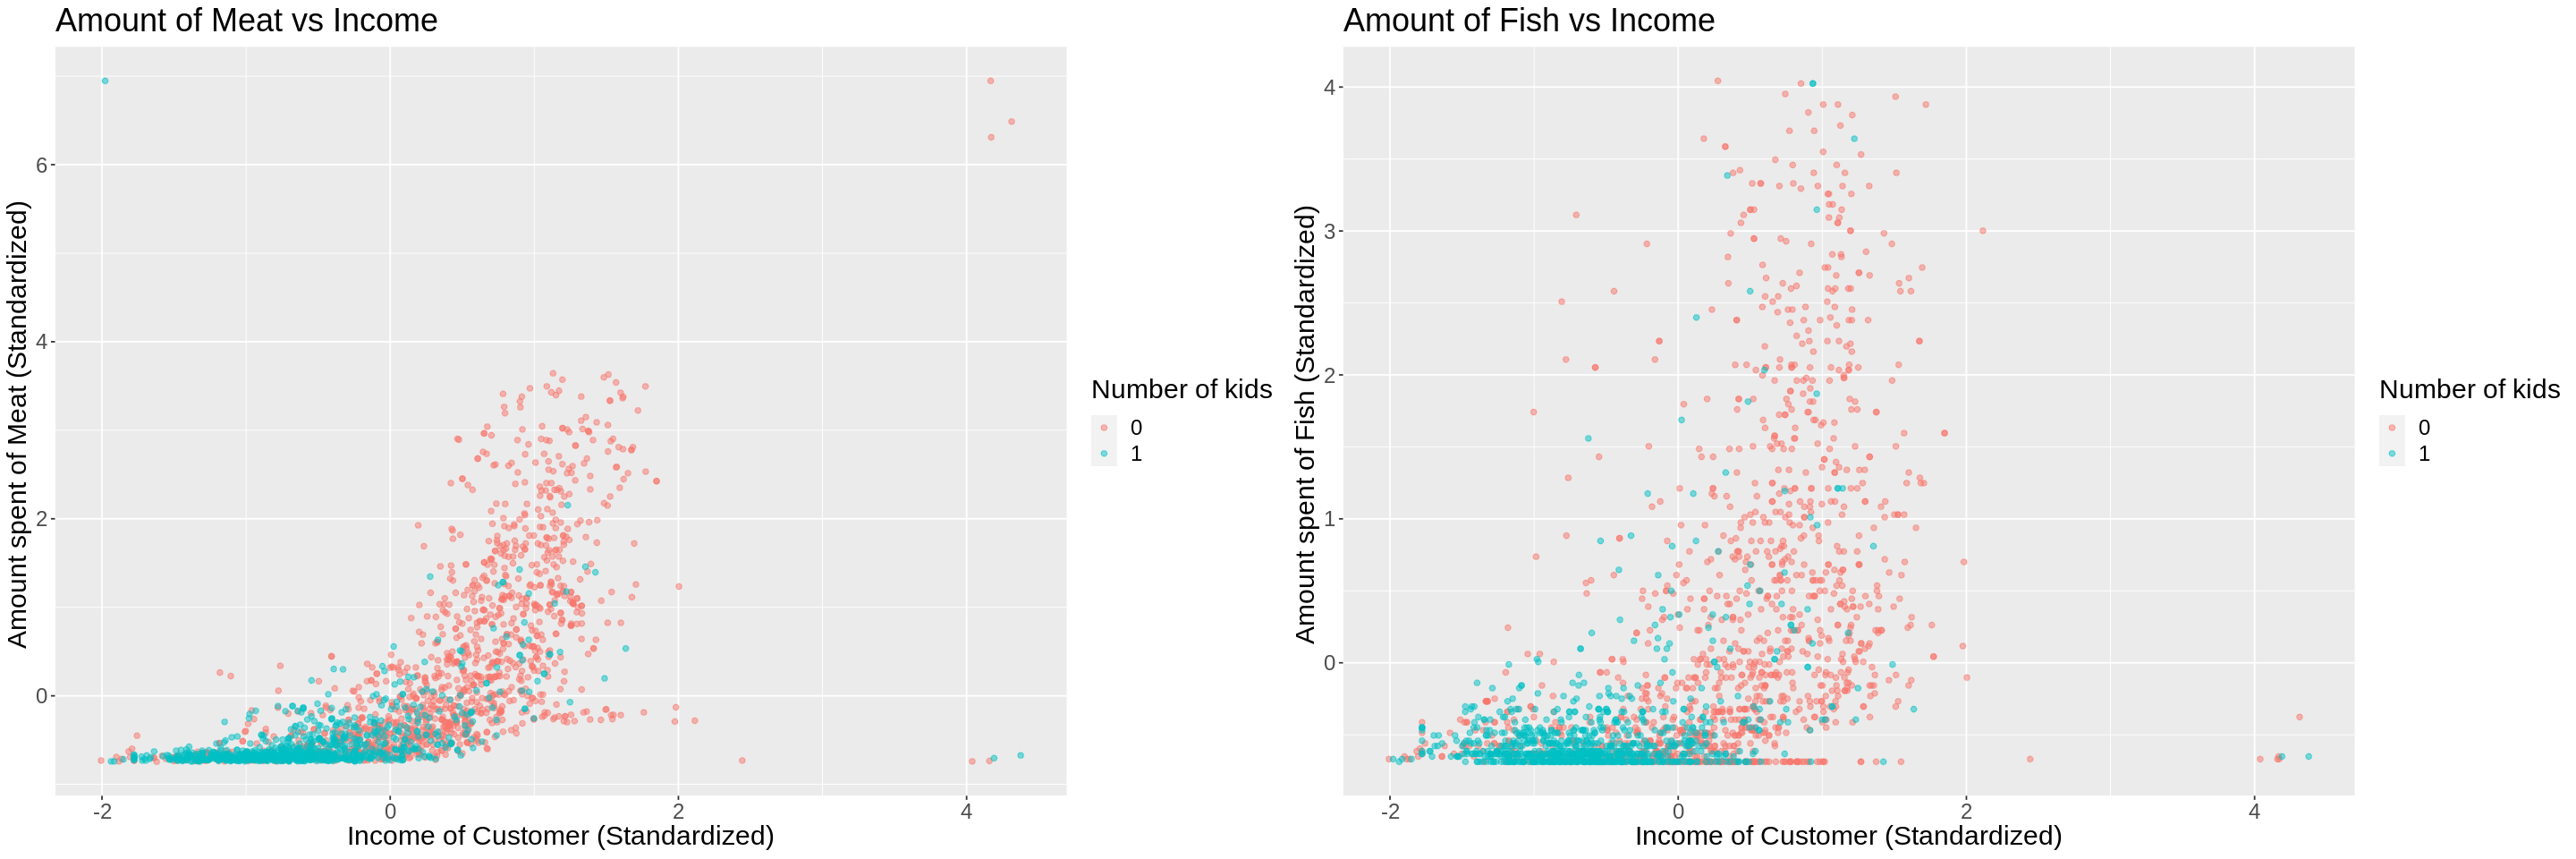

In [14]:
# Re-visualizing the predictor variables

options(repr.plot.height = 8, repr.plot.width = 24)

plot_grid <- plot_grid (marketing_meat, marketing_fish, ncol=2)  
plot_grid

*Fig 3: Choosing the two predictor variables along with Income, Amount of Meat products and Amount of Fish products*

## Finding the Accurate Value of K:

### Cross Validation 

Before performing the KNN-Classification model, we need to find the best value of K to make sure our data isn't under or over fitted. For that purpose, we can use the V-fold method as done below.

We will perform a 5 fold cross validation where we split our training dataset into c evenly sized chunks and then iteratively use 1 chunk as the validation set for evaluation and the remaining c-1 chunks as the training sets.
5-fold cross-validation helps reduce overfitting, provide more accurate performance estimates, make efficient use of data, and provide insight into model variability. These techniques are essential for building effective machine learning models that can accurately generalize to new data.

Here, we will set c to be 5 and perform a 5 fold cross-validation.

In [15]:
set.seed(133) # Seed value DO NOT REMOVE

marketing_vfold <- vfold_cv(marketing_train, v = 5, strata = Kidhome)    # Creating a 5 Fold cross validation

Creating the Recipe and Workflow for our data analysis 

In [16]:
set.seed(133) # Seed value DO NOT REMOVE

marketing_recipe <- recipe(Kidhome ~ Income + MntMeatProducts + MntFishProducts, data = marketing_train) |>    # Creating a the recipe  
                      step_scale(all_predictors()) |>
                      step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>                               # Tuning the KNN Classification to find best value of K 
              set_engine("kknn") |>
              set_mode("classification")

We use the **tune_grid** function to fit the model for each value in a range of parameter values. We then aggregate the mean and standard error by using the **collect_metrics** function.
Finally, we filter for accuracy from the **.metric** column of knn_results.

In [17]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))     # Creating a tibble of possible values of k from 1 to 100 incremented by 5

In [18]:
set.seed(133) # Seed value DO NOT REMOVE

knn_results <- workflow() |>                                                       # Adding the recipe and tuned model on the workflow and finding the accuracy
                  add_recipe(marketing_recipe) |>
                  add_model(knn_spec) |>
                  tune_grid(resamples = marketing_vfold, grid = k_vals) |>
                  collect_metrics() |>
                  filter(.metric == "accuracy")


knn_results 

! Fold1: internal:
  No observations were detected in `truth` for level(s): '2'
  Computation will proceed by ignoring those levels.

! Fold2: internal:
  No observations were detected in `truth` for level(s): '2'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): '2'
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): '2'
  Computation will proceed by ignoring those levels.

! Fold5: internal:
  No observations were detected in `truth` for level(s): '2'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7470168,5,0.009247607,Preprocessor1_Model01
6,accuracy,multiclass,0.7616981,5,0.010718139,Preprocessor1_Model02
11,accuracy,multiclass,0.7713042,5,0.011386548,Preprocessor1_Model03
16,accuracy,multiclass,0.7780711,5,0.013398182,Preprocessor1_Model04
21,accuracy,multiclass,0.7842842,5,0.009608704,Preprocessor1_Model05
26,accuracy,multiclass,0.7842842,5,0.010134148,Preprocessor1_Model06
31,accuracy,multiclass,0.7820243,5,0.012558625,Preprocessor1_Model07
36,accuracy,multiclass,0.7871075,5,0.012302518,Preprocessor1_Model08
41,accuracy,multiclass,0.7865393,5,0.012975527,Preprocessor1_Model09


*Table 10: Results of v-fold, with all possible values of K*

### Visualizing and Selecting K

For finding the value of K that best fits our model, we create a line plot using the accuracies dataset with neighbors on the x-axis and the mean on the y-axis and choose optimal k value.

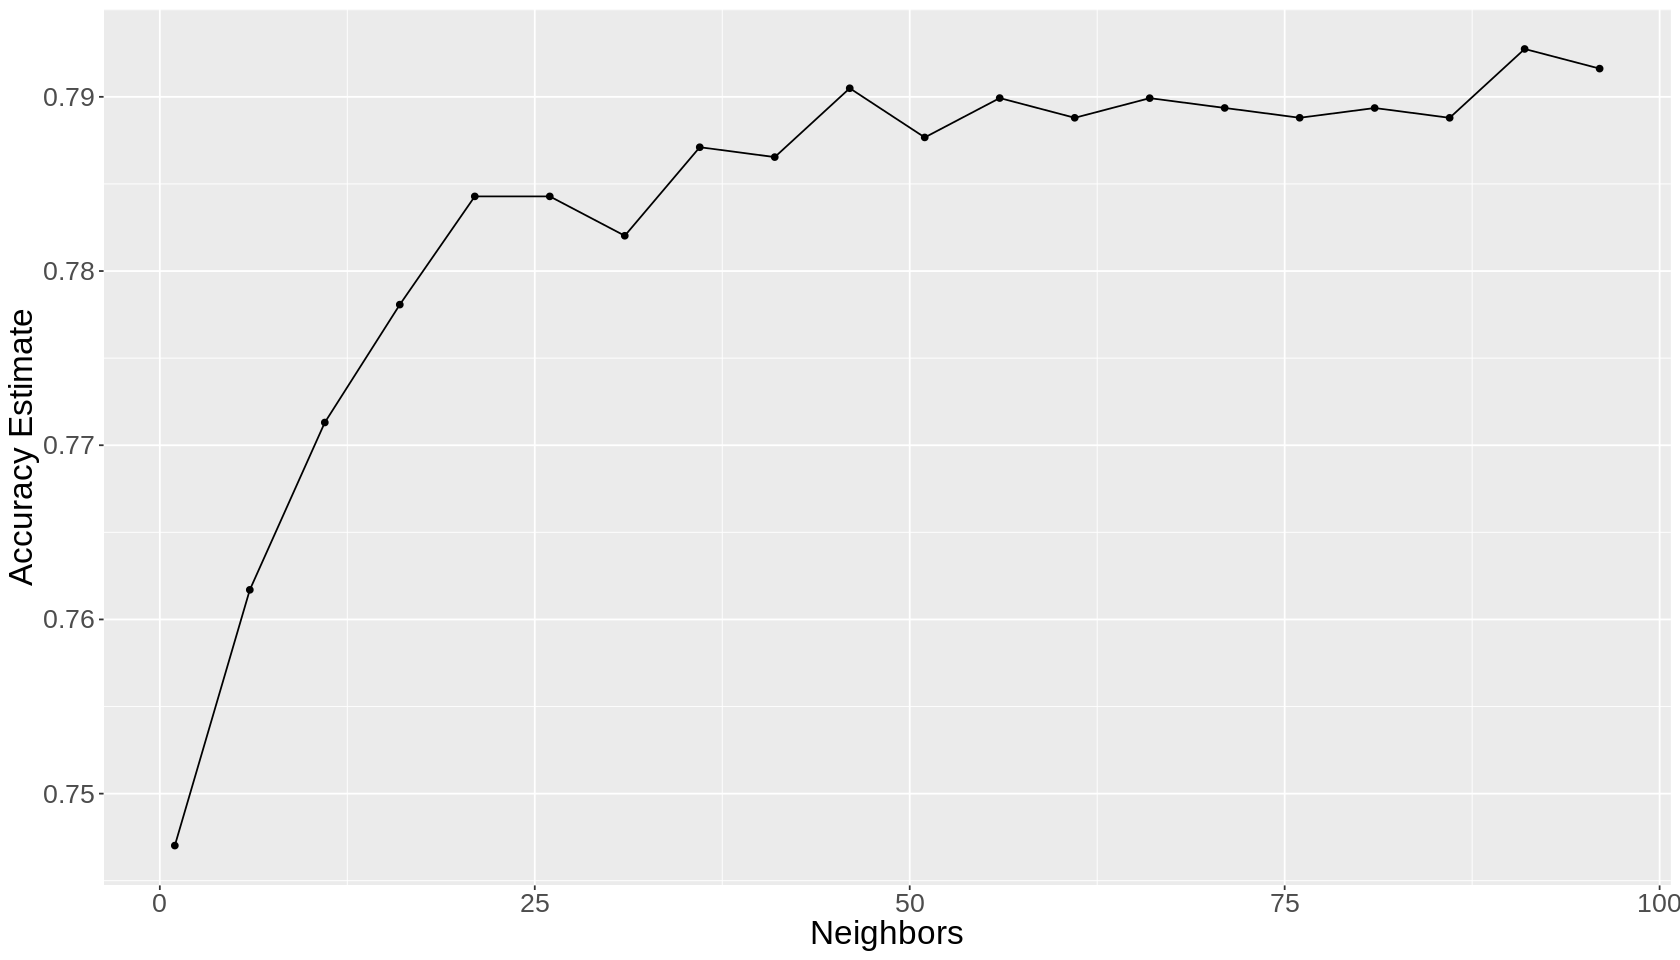

In [19]:
options(repr.plot.height = 8, repr.plot.width = 14)

cross_val_plot <- knn_results |>                                        # Creating the visaulization for the possible values of k along with its mean accuracy
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Accuracy Estimate") +
                    theme(text = element_text(size = 20))


cross_val_plot

*Fig 4: Visualization of results of v-fold, with all possible values of K*

In [20]:
k_best <- knn_results |>                                              # finding the value of k with highest mean (accuracy)
            filter(mean==max(mean))
k_best

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
91,accuracy,multiclass,0.7927477,5,0.01291819,Preprocessor1_Model19


From the plot above, we can see that **K = 91** provides the highest accuracy. **K** values that are smaller or larger than this result in a reduced accuracy estimate. 

## Building the classifier using the best K

Using the value of k that best fits our model, we can predict the number of kids in a home using the predictor variables, from our test data set and measure the accuaracy. 

In [21]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 91) |>    # running the KNN classification model with best value of K
                      set_engine("kknn") |>
                      set_mode("classification")

marketing_fit <- workflow() |>                                                       # adding the model onto the workflow and fitting on the training data
                  add_recipe(marketing_recipe) |>
                  add_model(knn_best_spec) |>
                  fit(data = marketing_train)

marketing_predictions <- predict(marketing_fit, marketing_test) |>                   # Predicting on the test dataset and displaying predicted value usinf bind_cols
                            bind_cols(marketing_test)

head(marketing_predictions)

.pred_class,Kidhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
0,0,0.7693040,0.3584298,0.5690305,-0.1783278,1.33990090,-0.1467879,-0.03792796
0,0,1.2137074,2.0778250,-0.1094651,-0.2318315,0.39016534,0.9975427,0.01996987
0,0,0.2526409,1.6657631,-0.6623135,-0.3611323,-0.68741925,-0.6580846,-0.48181131
0,0,0.5194736,0.2339219,-0.6623135,-0.2897940,-0.30387219,0.1210341,-0.75200118
1,0,-0.4591513,-0.1040282,-0.5869251,-0.6241925,0.02488243,-0.5119998,1.06213080
1,0,-1.7775837,-0.8955428,-0.2099830,-0.6821549,-0.41345707,-0.1224405,0.11646626


*Table 11: Predictions on our test dataset*

### Measuring Accuracy

Compare the accuracy of predictions to the true values in the test set

In [22]:
marketing_acc <- marketing_predictions |>                                        # calculating the accuracy of the model using metrics analysis
                    metrics(truth = Kidhome, estimate = .pred_class) |> 
                    select(.metric, .estimate) |> 
                    head(1)
marketing_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.8040541


Compare the predictions to the true values in a confusion matrix to find out the predicted values against the true values.

In [23]:
marketing_cm <- marketing_predictions |>                                    # finding the confusion matrix
                    conf_mat(truth = Kidhome, estimate = .pred_class)

marketing_cm

          Truth
Prediction   0   1   2
         0 216  46   0
         1  41 141   0
         2   0   0   0

*Table 12: Confusion Matrix*

From the code above and the accuracy measured, we can see that our model is **80.4%** accurate which is very high and useful to a marketing firm for predicting the number of kids in a household and form strategies for their target audience based on this data.

### Testing New Observations

Creating a new set of testing values to run our model.

In [24]:
new_observations <- tibble(observations = c("Observation 1", "Observation 2",                   # creating a new tibble of new random test observations
                                            "Observation 3", "Observation 4",  
                                            "Observation 5","Observation 6"), 
                           Income = c(-1.5,-1.25,-0.8,0,1,2), 
                  MntMeatProducts = c(-0.5,-0.3,-0.38,1,-0.3,0),
                  MntFishProducts = c(0.3,-0.6,1.1,0.7,2,1))
new_observations

observations,Income,MntMeatProducts,MntFishProducts
<chr>,<dbl>,<dbl>,<dbl>
Observation 1,-1.50,-0.50,0.3
Observation 2,-1.25,-0.30,-0.6
Observation 3,-0.80,-0.38,1.1
Observation 4,0.00,1.00,0.7
Observation 5,1.00,-0.30,2.0
Observation 6,2.00,0.00,1.0


*Table 13: Table of new observations*

Putting the new observation values on the scatter plot of our original data to obsereve and predict the number of kids manually.

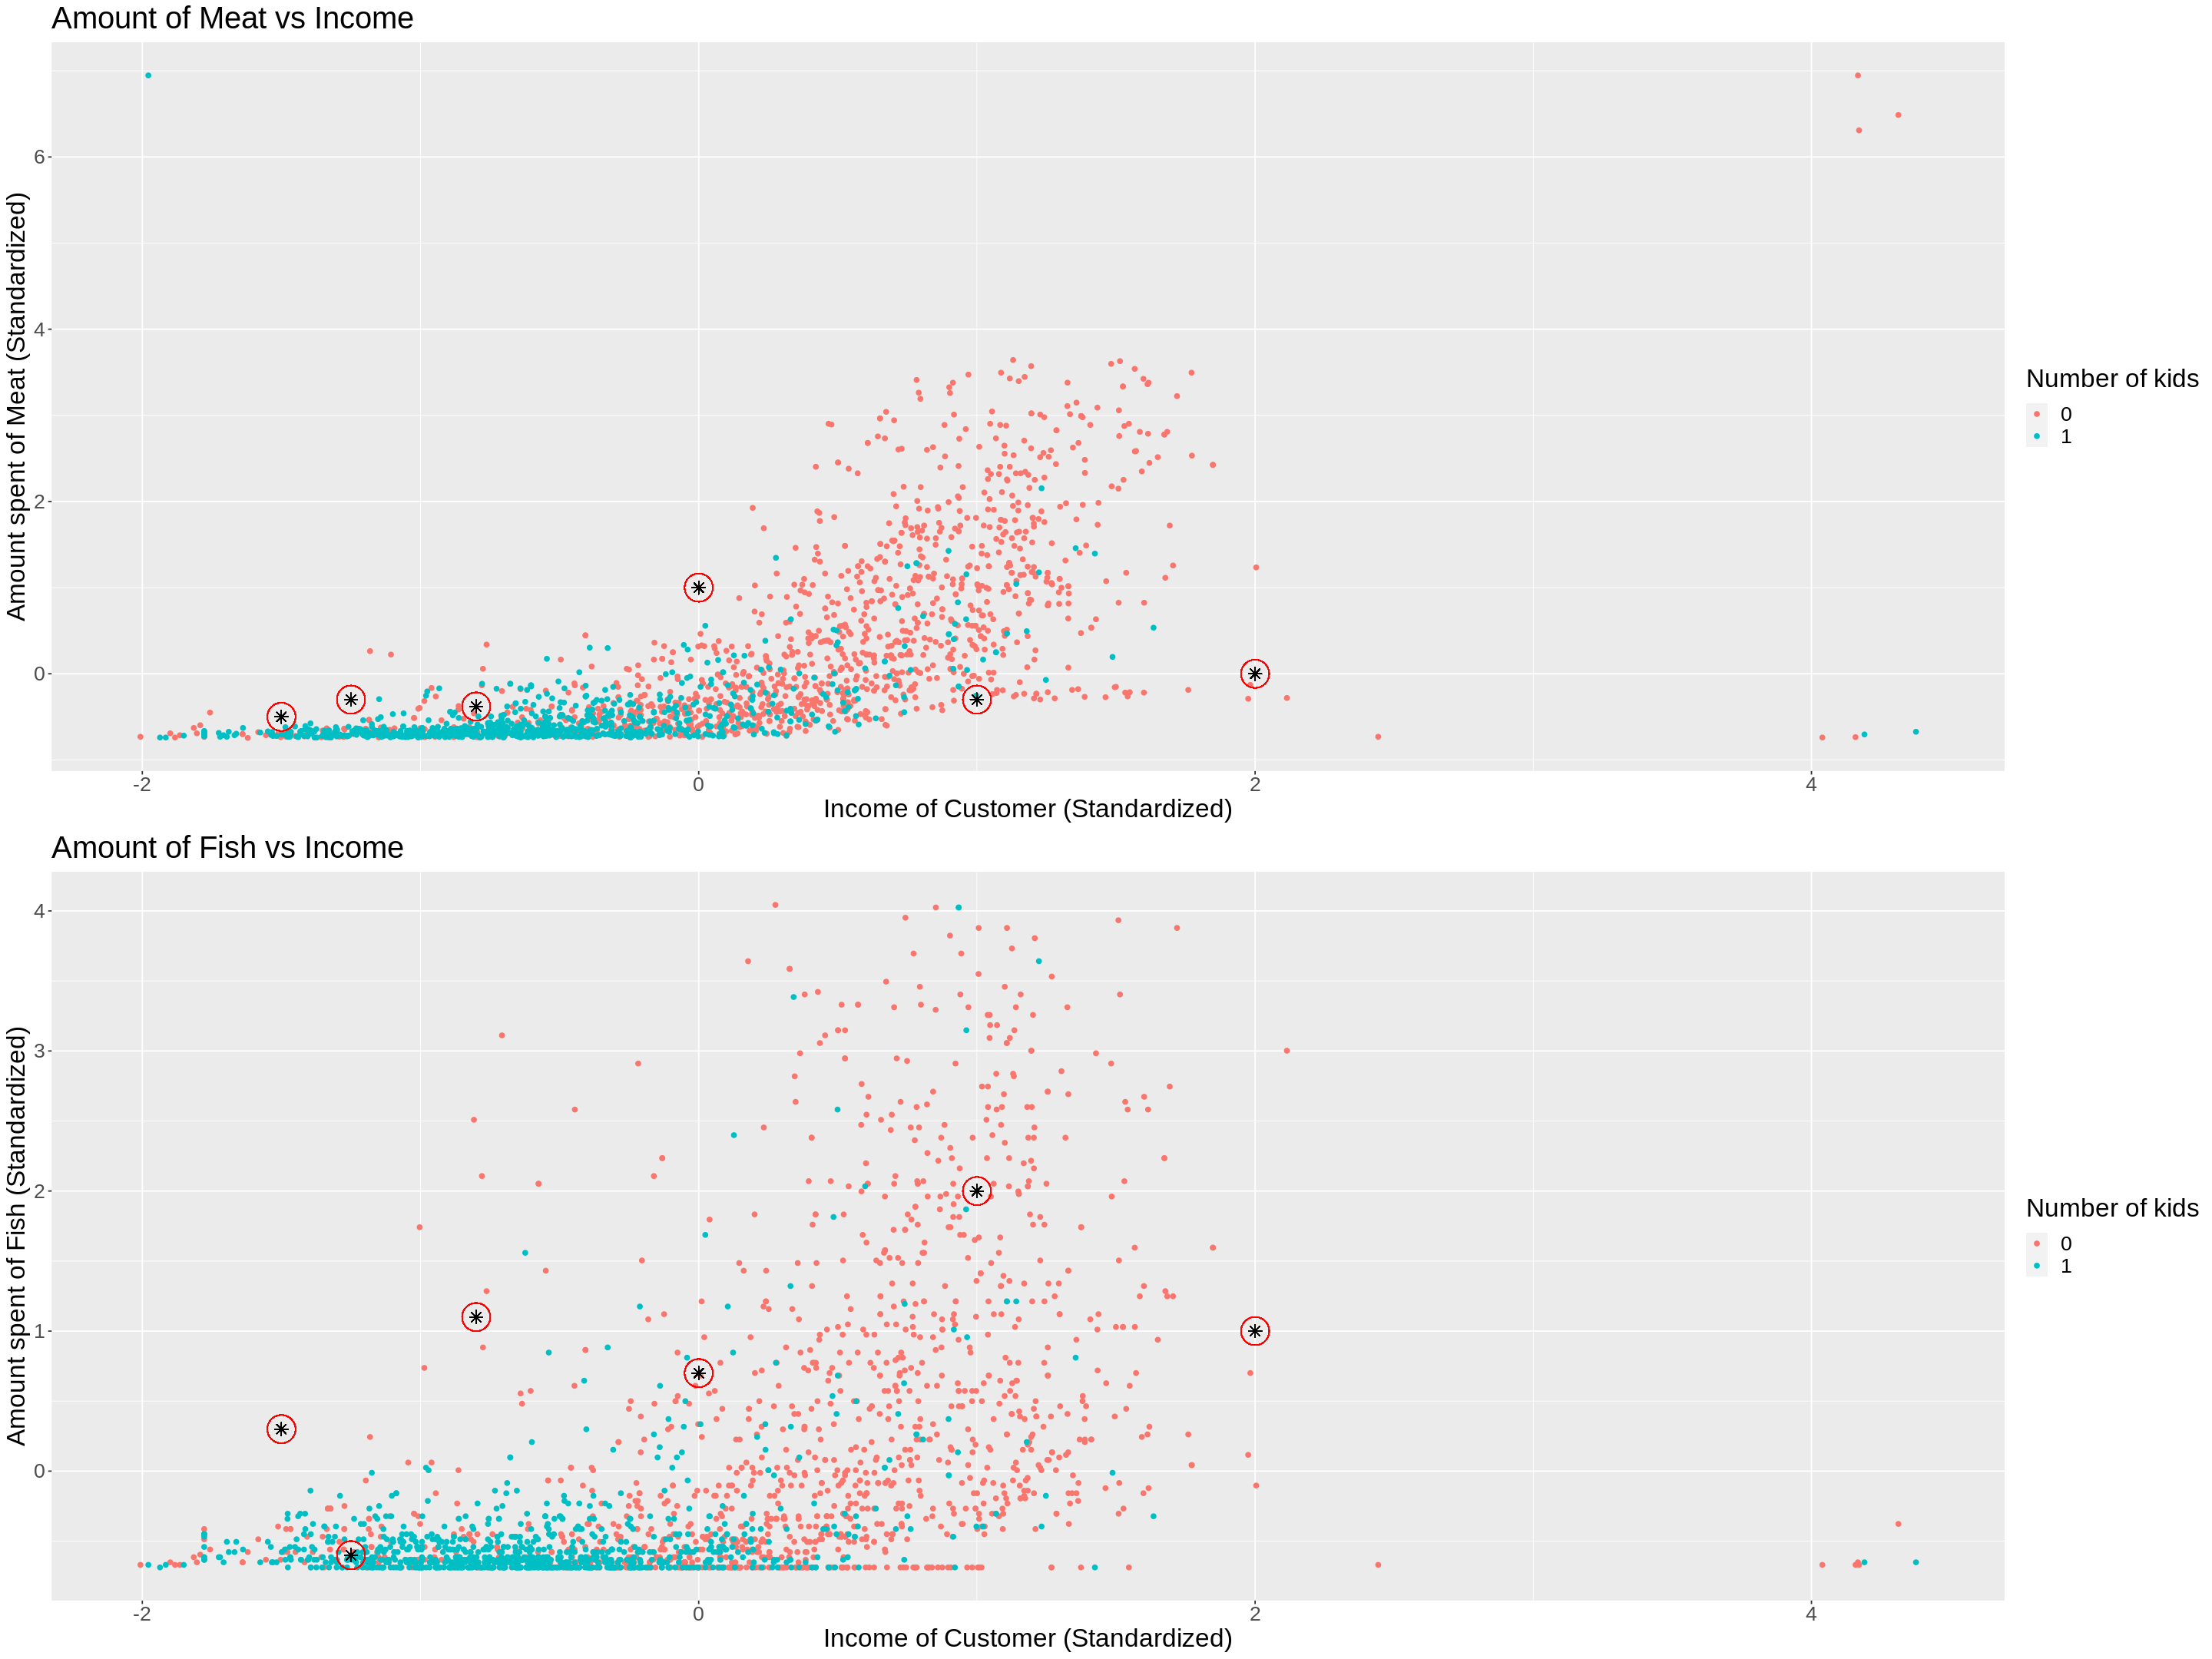

In [25]:
options(repr.plot.height = 18, repr.plot.width = 24)

point1 <- c(-1.5,-0.5, 0.3)
point2 <- c(-1.25,-0.3,-0.6)
point3 <- c(-0.8, -0.38, 1.1)
point4 <- c(0, 1, 0.7) 
point5 <- c(1, -0.3, 2)
point6 <- c(2, 0, 1)

# visualizing the points on the original scatter plots for MntMeatProducts and MntFishProducts    

newobs_meat_plot <- marketing_scaled |>                                                                                      
                        ggplot (aes(x = Income, y = MntMeatProducts, color = Kidhome)) +
                            geom_point() +
                            geom_point(aes(x = point1[1], y = point1[2]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point1[1], y = point1[2]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point2[1], y = point2[2]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point2[1], y = point2[2]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point3[1], y = point3[2]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point3[1], y = point3[2]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point4[1], y = point4[2]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point4[1], y = point4[2]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point5[1], y = point5[2]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point5[1], y = point5[2]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point6[1], y = point6[2]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point6[1], y = point6[2]), color = "black", size = 3, shape = 8) +
                            ggtitle("Amount of Meat vs Income") +
                            labs(x = "Income of Customer (Standardized)", y = "Amount spent of Meat (Standardized)", color = "Number of kids")+
                            theme(text = element_text(size = 20)) 

newobs_fish_plot <- marketing_scaled |>
                        ggplot (aes(x = Income, y = MntFishProducts, color = Kidhome)) +
                            geom_point() +
                            geom_point(aes(x = point1[1], y = point1[3]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point1[1], y = point1[3]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point2[1], y = point2[3]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point2[1], y = point2[3]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point3[1], y = point3[3]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point3[1], y = point3[3]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point4[1], y = point4[3]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point4[1], y = point4[3]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point5[1], y = point5[3]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point5[1], y = point5[3]), color = "black", size = 3, shape = 8) +
                            geom_point(aes(x = point6[1], y = point6[3]), color = "red", size = 10, shape = 21) +
                            geom_point(aes(x = point6[1], y = point6[3]), color = "black", size = 3, shape = 8) +
                            ggtitle("Amount of Fish vs Income") +
                            labs(x = "Income of Customer (Standardized)", y = "Amount spent of Fish (Standardized)", color = "Number of kids")+
                            theme(text = element_text(size = 20)) 


plot_grid <- plot_grid (newobs_meat_plot,newobs_fish_plot, ncol =1)
plot_grid



*Fig 5: Plotting new observations on our existing data*

Just from manual observation of the graphs, it can be observed that the number of kids using the predictor variables are as follows

In [26]:
pred_values <- tibble(observations = c("Observation 1", "Observation 2",                   # creating a tibble of manual analysis results
                                            "Observation 3", "Observation 4",  
                                            "Observation 5","Observation 6"), 
                           Kidhome = c(1,1,0,0,0,0))

pred_values

observations,Kidhome
<chr>,<dbl>
Observation 1,1
Observation 2,1
Observation 3,0
Observation 4,0
Observation 5,0
Observation 6,0


*Table 14: Results of Initial Manual Prediction*

There is an urcertainity in observation 3 as it is hard to predict from two given predictors what the number of kids would be (Amount of Meat predict 1, Amount of Fish predict 0).
However, it seems Amount of fish has more affect on the model in this situation thus, selecting Kidhome to be 0. 

In [27]:
prediction <-  bind_cols(observations = c("Observation 1", "Observation 2",               # creating a tibble of model analysis results
                                            "Observation 3", "Observation 4", 
                                            "Observation 5","Observation 6"),
                         Kidhome = predict(marketing_fit, new_observations))
prediction

observations,.pred_class
<chr>,<fct>
Observation 1,1
Observation 2,1
Observation 3,0
Observation 4,0
Observation 5,0
Observation 6,0


*Table 15: Results of knn classification model*

It can be seen that the number of kids matches 100% from our initial prediction but it is worth noting that the model is only approximately 80% accuarate and these predictions could contain flaws as the data points increase and the predictions become more complex.

However, this is a clear indication that our model is successful and it works well for our purpose.

## Methods

In this problem, we are dealing with a classification task, and a KNN classification model was used to make predictions. The model was tuned using the v-fold cross-validation method to enhance its accuracy and suitability for our needs. The goal was to predict the number of kids in a household based on the purchase amount of fish and meat products, along with the income levels of the household.

Out of the 2240 entries, 80% of the data was used for training, and the remaining 20% for testing the model. This approach ensures that the model is adequately trained and performs well on new data. Moreover, to simplify the problem and ensure relevant features were used, we removed some unused variables that could have made it difficult to identify patterns, and we used scatter plots to visualize the data. Along with that, we also re arranged the data points for Kidhome = 2 to better fit our model as they were rare in the dataset. By doing this we were able to find out if a household had 0 or more than 0 kids. 

The ggplot library was used for data visualization, making it easier to understand and interpret the data. We could identify patterns and trends in the data, such as the higher the income level, the higher the expenditure on fish products, or that the expenditure on meat products decreased as the number of kids in the household increased. By removing the unused variables, the visualization was clear and focused on the relevant features, making it easier to identify patterns and trends.

The predictions made by the KNN classification model, when combined with the income levels of the household and the purchase amount of fish and meat products, can help businesses like food and beverage companies predict the spending habits of a household. This information is valuable for businesses to make informed decisions about product development, marketing strategies, and targeting potential customers.

In conclusion, by using the KNN classification model, v-fold cross-validation method, and data visualization techniques, we were able to predict the number of kids in a household based on the purchase amount of fish and meat products and income levels of the household. The results of this study can help businesses make informed decisions based on consumer behavior, and provide them with the information they need to develop and market their products effectively.

## Results

The relationship between income, food consumption, and family size is complex and can vary depending on numerous factors. However, based on our model, we have identified some trends that can be useful in understanding this relationship.

Firstly, our model suggests that households with lower incomes and lower meat and fish purchases are more likely to have only one child. This could be due to financial constraints that limit the ability of the household to afford a larger family, as well as cultural or social factors that prioritize having a smaller family size.

Similarly, households with low incomes and higher meat or fish purchases are also likely to have only one child. This could be due to the fact that meat and fish are relatively expensive sources of protein, and therefore, families with limited financial resources may choose to limit their consumption of these foods in order to save money.

However, households with low incomes and high meat and fish purchases are more likely to have zero children. This could be due to the fact that the cost of high meat and fish consumption, combined with the financial strain of supporting a family, may make it difficult for the household to afford children.

On the other hand, our model suggests that households with high incomes and any combination of meat and fish purchases are almost certain to have zero children. This could be due to a variety of reasons, such as a focus on career or lifestyle goals that prioritize personal fulfillment over starting a family, or a preference for smaller family sizes due to factors such as environmental concerns or the desire for more individual attention and resources for each child.

It's important to note that these trends are based on the specific factors included in our model, and may not be generalizable to all populations or circumstances. Additionally, it's important to approach this topic with sensitivity and avoid making assumptions about people's choices or circumstances based solely on income or food consumption patterns.


![image](https://media.giphy.com/media/3o6Mb5WcpQysXwDYzK/giphy.gif)

## Expected Outcomes and Significance

### Summary

The KNN classification model has proved to be very useful in predicting the number of kids in a household based on their purchasing habits and income levels. The model is highly accurate, with an 80% accuracy rate, which confirms its usability and efficiency. It can be deployed by marketing firms to help food and beverage companies make informed decisions about product development and marketing strategies.

This model can help companies select their target audience carefully, particularly when the target audience comprises children and teens. Such a target audience requires careful and ethical marketing, which can be achieved by using a model like this. The predictions made by this model can help businesses make strategic decisions and plan their advertising campaigns effectively.

The classification model was most appropriate for this task, as it was easy to identify the classes of households based on the number of kids and their purchasing habits. This allowed us to use the KNN algorithm, which is widely used for classification tasks. Tuning the model using v-fold cross-validation helped to identify the best values of K, which resulted in a highly accurate model.

Overall, this study demonstrates the importance of using a classification model to predict the number of kids in a household. By analyzing their purchasing habits and income levels, businesses can gain valuable insights into consumer behavior, which can be used to develop effective marketing strategies. The KNN classification model is a powerful tool that can help companies make informed decisions based on accurate data analysis.

## What do you expect to find?

From our initial observation, it can be inferred that houses having a lower income and lower amount spent on fish and meat products are more likely to have one child wheread households having higher amount spent on fish and meat product are more likely to have no children irrespective of their income. This is in accordance with what our model predicts to a high accuracy. 
Houses with 2 children are spread almost evenly on these plots and it can be difficult to find a clear relationship due to their limited sample size. Thus we combined these datapoints with non zero kidhomes to better suit our needs

## Impact of Findings

By understanding the demographics of their target audience, a company can tailor their product and marketing strategies to better meet the needs and preferences of their customers. For example, if a company knows that their customers are predominantly families with young children, they may choose to market their products in a way that emphasizes convenience and affordability for busy parents.

Similarly, knowing the number of kids in a household can be useful in identifying changes required in the product and marketing strategies. For example, if a company discovers that many of their customers have larger families, they may choose to offer larger sizes or quantities of their products, or bundle items together in a way that is more appealing to families.

Overall, understanding the demographics of their target audience is a valuable tool for companies looking to succeed in a competitive market. By tailoring their products and marketing strategies to the specific needs and preferences of their customers, they can increase their chances of success and build long-term customer loyalty.

## Future Questions

It would be intriguing to explore how the demographics are affected by the addition of more households with two children, but it would be challenging to determine whether this correlation is indicative of a causal relationship or simply a coincidence.

## Citations

* [1] Kotler, P., & Keller, K. L. (2012). Marketing management.Pearson Education India.
https://www.academia.edu/43169301/Marketing_Management_Kotler
* [2] Imakash3011. (2019). Customer Personality Analysis [Data set]. Kaggle. 
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
* [3] Harris, J. L., Brownell, K. D., & Bargh, J. A. (2009). The food marketing defense model: Integrating psychological research to protect youth and inform public policy. Social Issues and Policy Review, 3(1), 211-271. https://pubmed.ncbi.nlm.nih.gov/20182647/
* [4] Keller, K. L., & Lehmann, D. R. (2006). Brands and branding: Research findings and future priorities. Marketing Science, 25(6), 740-759. https://www.jstor.org/stable/40057218
* [5] Calvert, S. L. (2008). Children as consumers: Advertising and marketing. The Future of Children, 18(1), 205-234. https://search.brave.com/search?q=49852129_Children_as_Consumers_Advertising_and_Marketing&source=desktop